Ce fichier est destiné à effectuer une analyse descriptive sur les différents variables sur les données déjà nettoyées.
Nous allons représenter la répartition des données.

In [7]:
import pandas as pd
df = pd.read_csv("../data/base_prospect_clean.csv")

Dans cette partie nous avons choisi d'effectuer une échelle logarithmique sur l'axe des ordonnées car nous avons remarqué qu'il y a une énorme différence entre la fréquence de certaines valeurs dans une colonne quelconque. Par contre nous avons décider de laisser la valeur de données telle qu'elle est pour avoir une meilleure compréhension de celle-ci.
L'analyse qui suit ne concerne que les variables quantitatives.

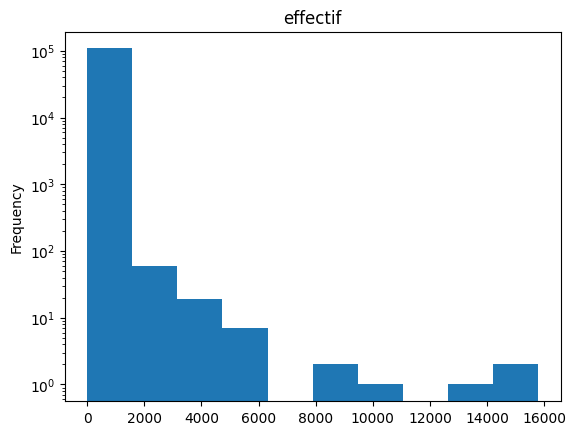

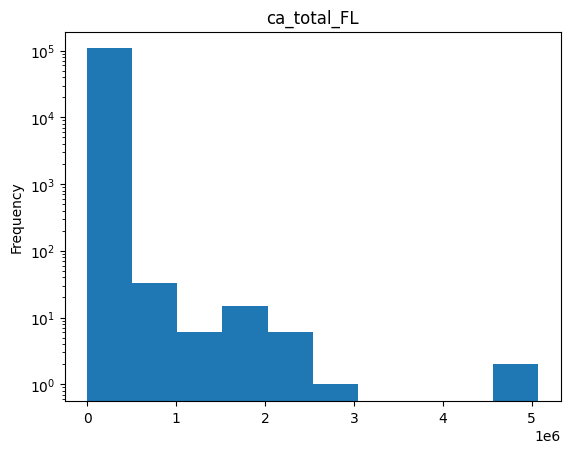

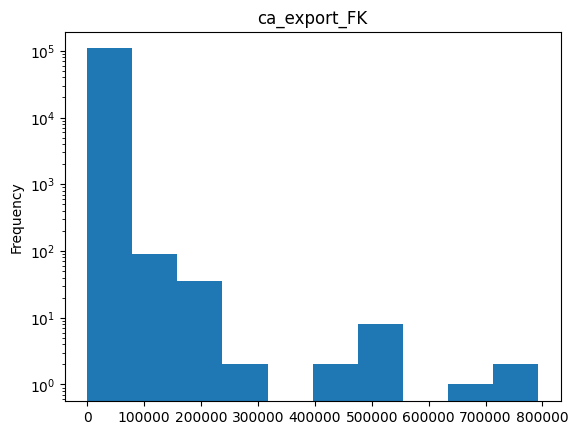

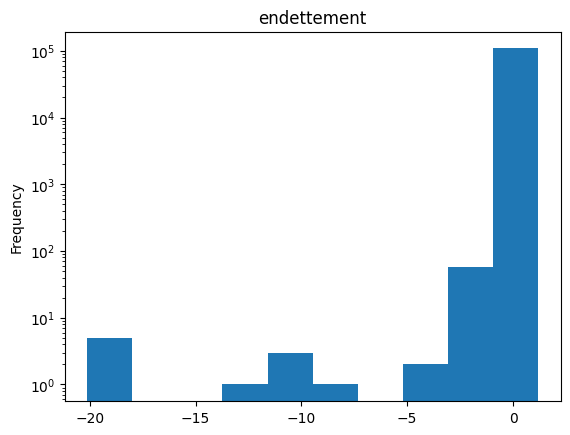

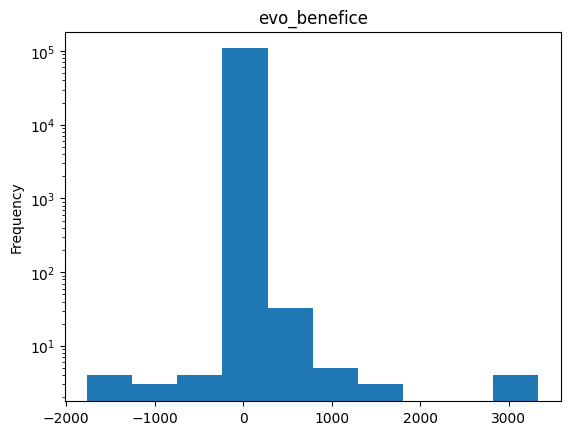

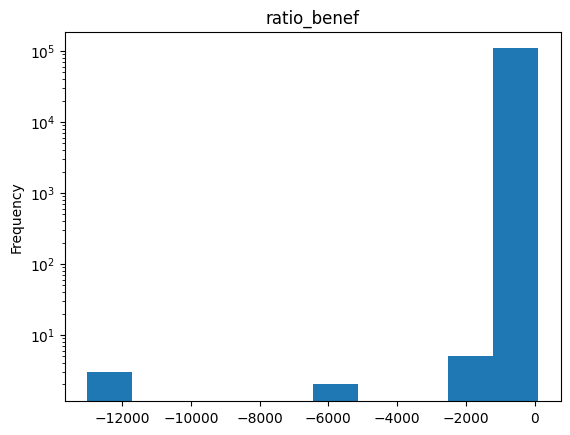

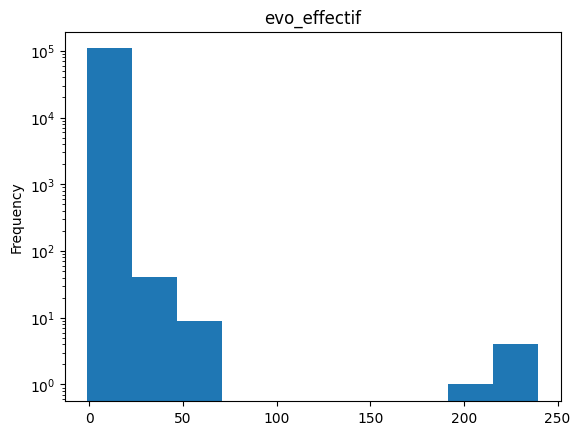

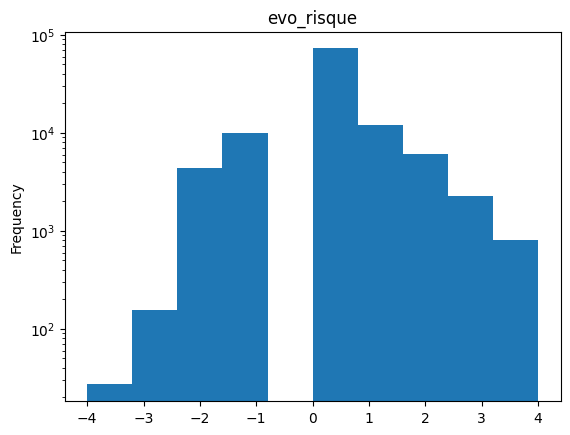

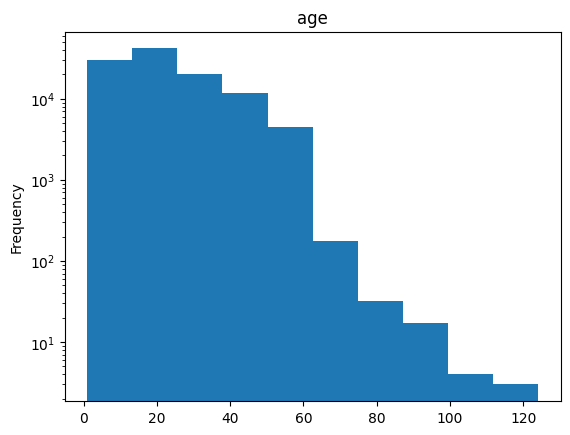

In [8]:
import matplotlib.pyplot as plt

col_to_omit = ['code_cr','dept','type_com','activite','actionnaire','forme_jur_simpl','chgt_dir','rdv','risque']
for col in df.columns:
    if col not in col_to_omit: 
        plt.figure()
        df[col].plot(kind='hist', logx=False, logy=True, title=col)
        plt.savefig('../fig/analyse_descriptive/'+col+'.png')    

Dans cette partie nous allons générer une matrice de nuages de points sur tous les variables numériques.

/tmp/ipykernel_12976/1654234712.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


<Figure size 640x480 with 0 Axes>

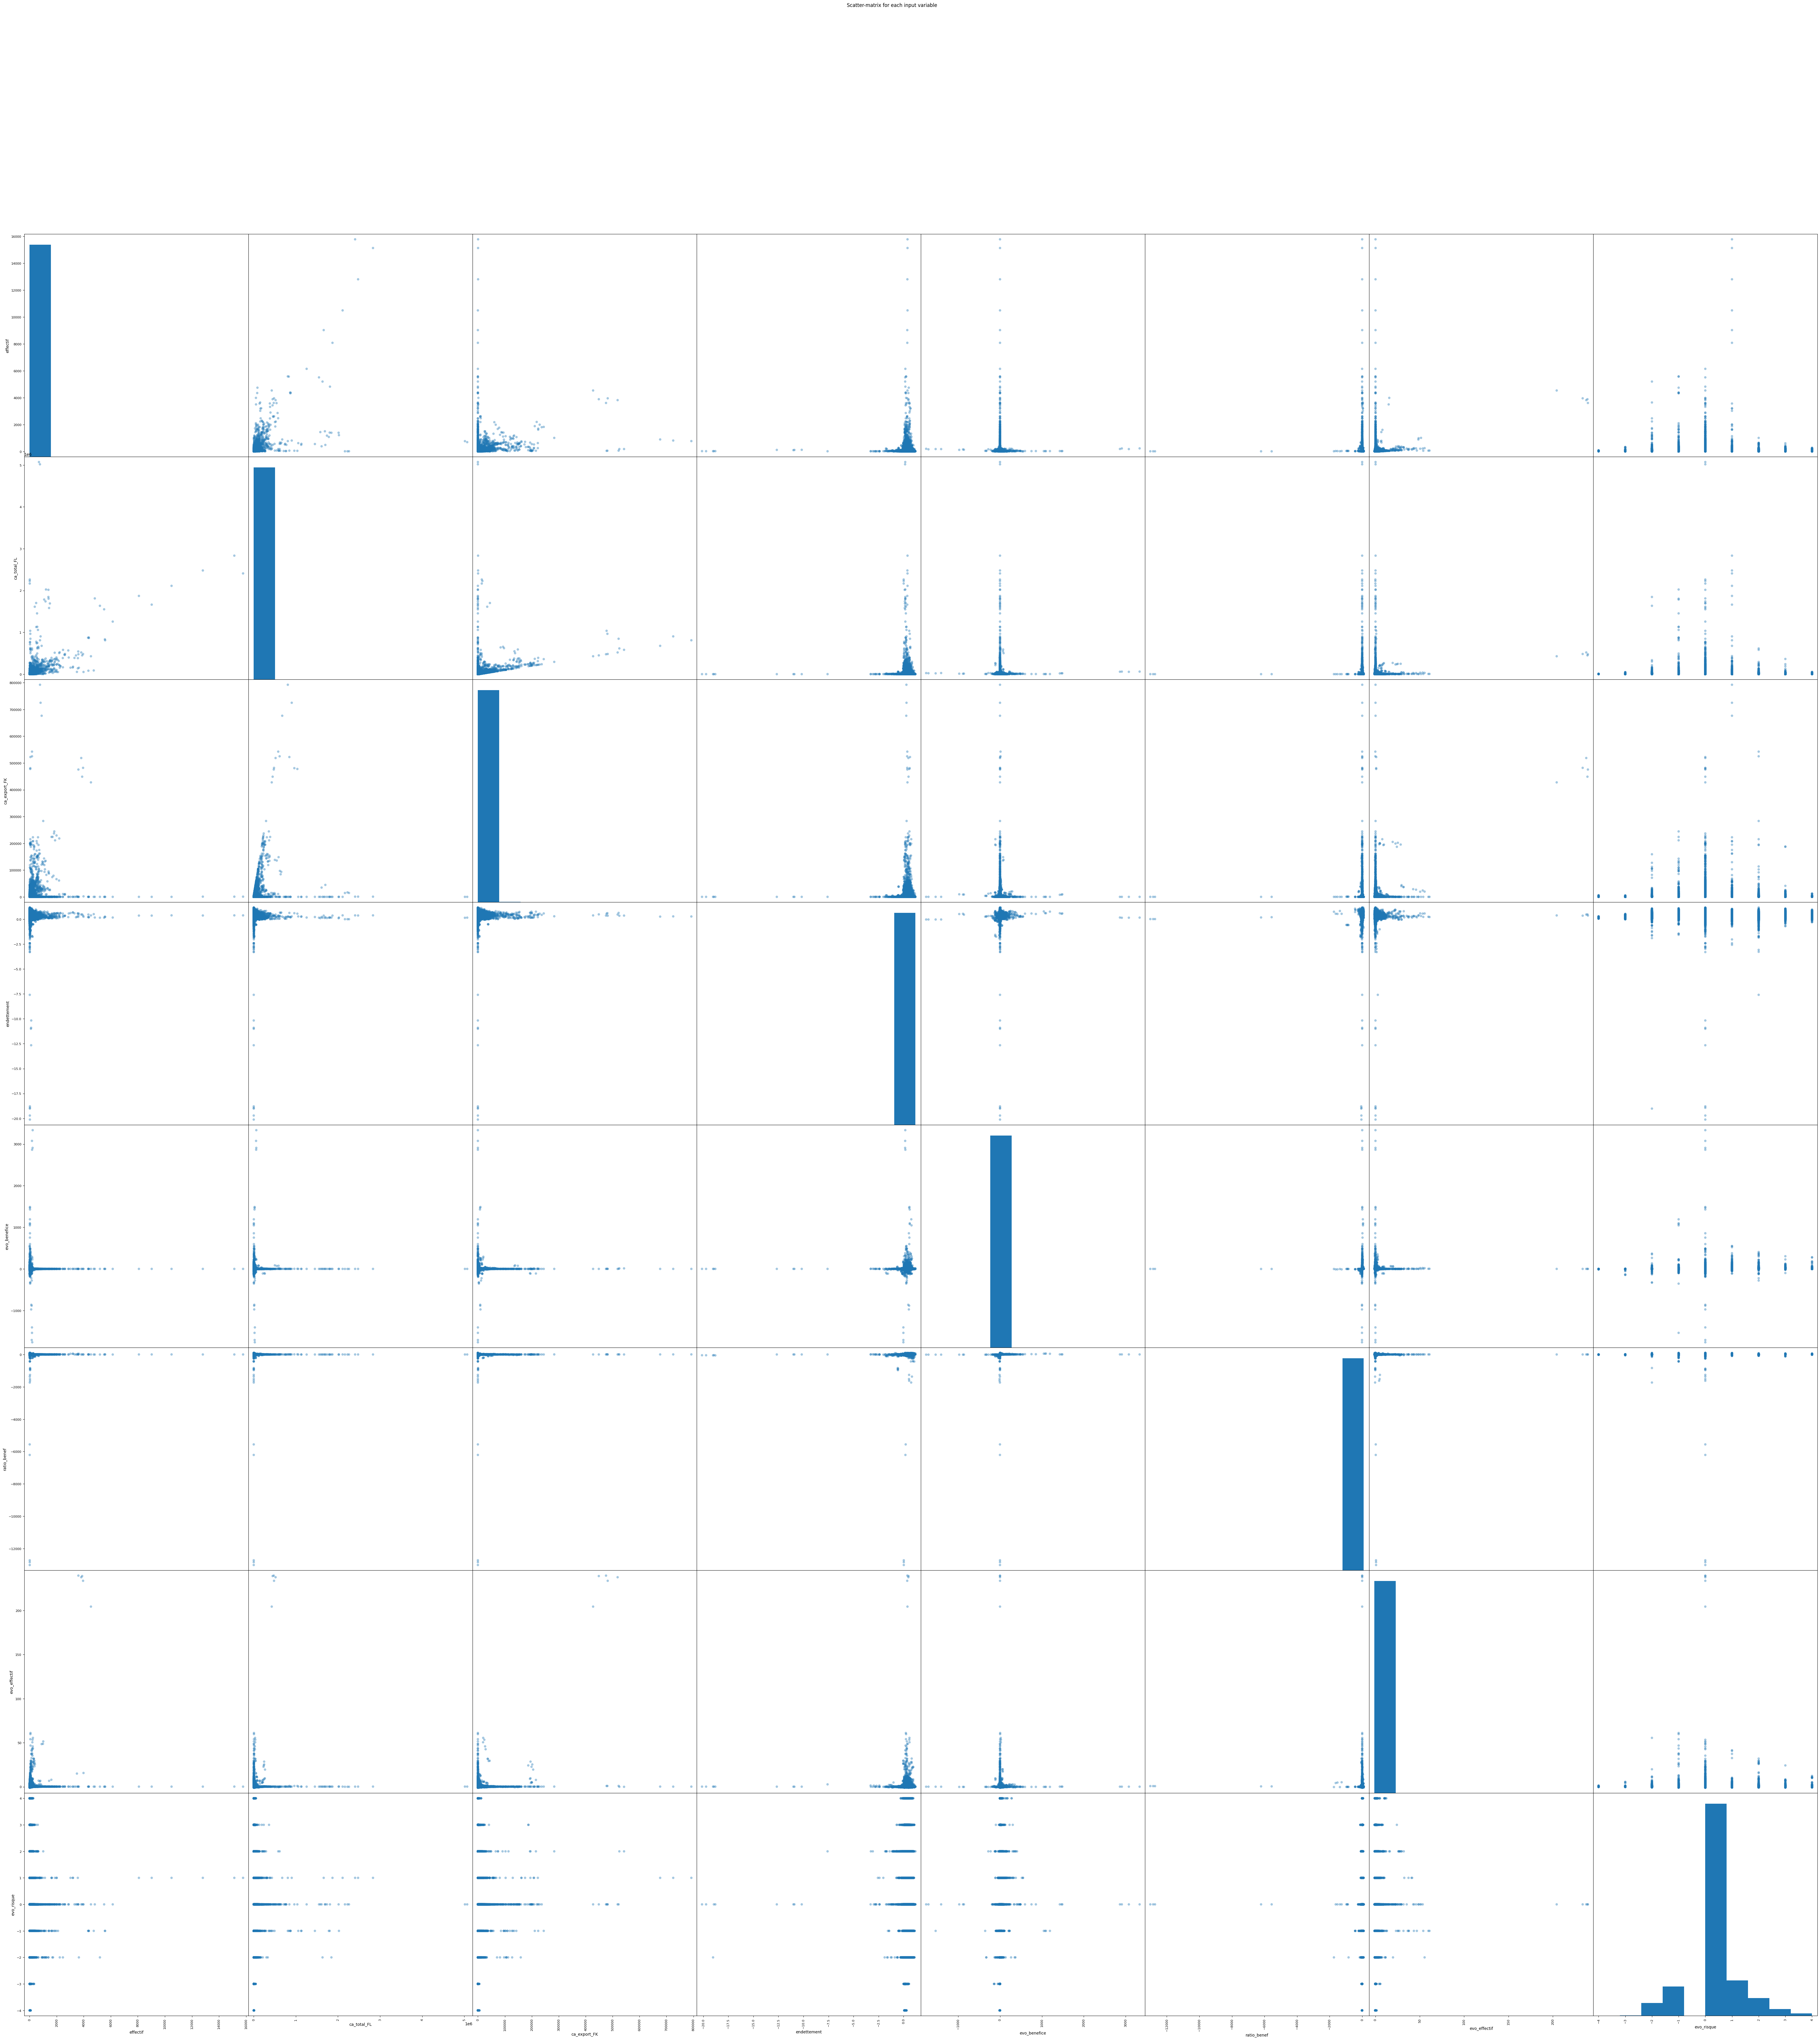

<Figure size 640x480 with 0 Axes>

In [9]:
# plot correlation between attributes w.r.t. classification
from matplotlib import cm

X = df.iloc[:,2:11]
# TODO
y = df.code_cr

fig = plt.figure()
cmap = cm.get_cmap('gnuplot')
# scatter = pd.plotting.scatter_matrix(X,, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
scatter = pd.plotting.scatter_matrix(X, alpha=0.4,marker='o',figsize=(80,80))
plt.suptitle('Scatter-matrix for each input variable')
plt.show()
plt.savefig('../fig/analyse_descriptive/df_scatter_matrix')
plt.close(fig)


Nous allons maintenant se concentrer sur la distribution des valeurs catégorielles.

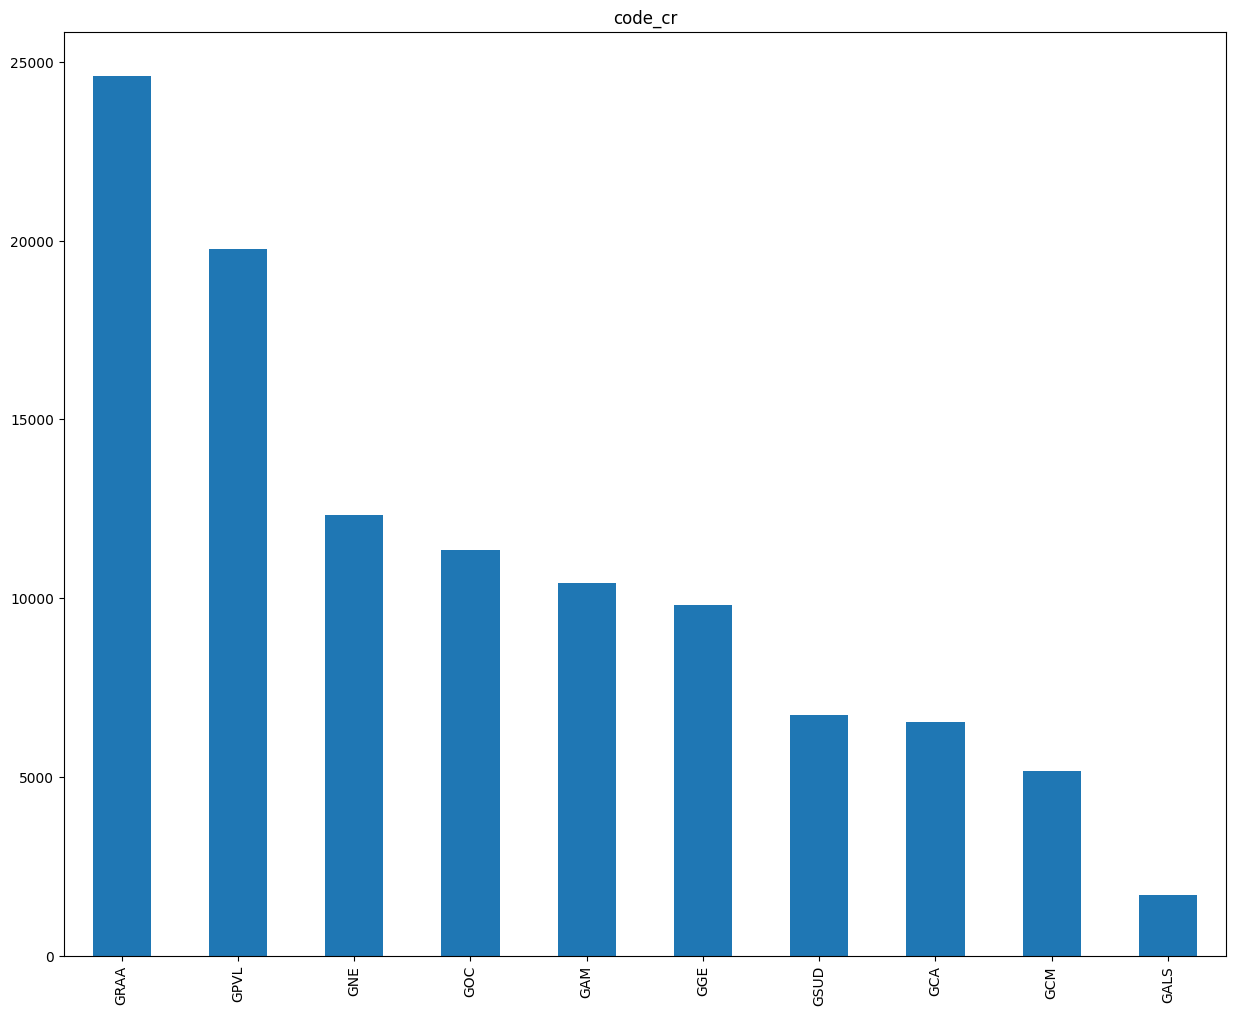

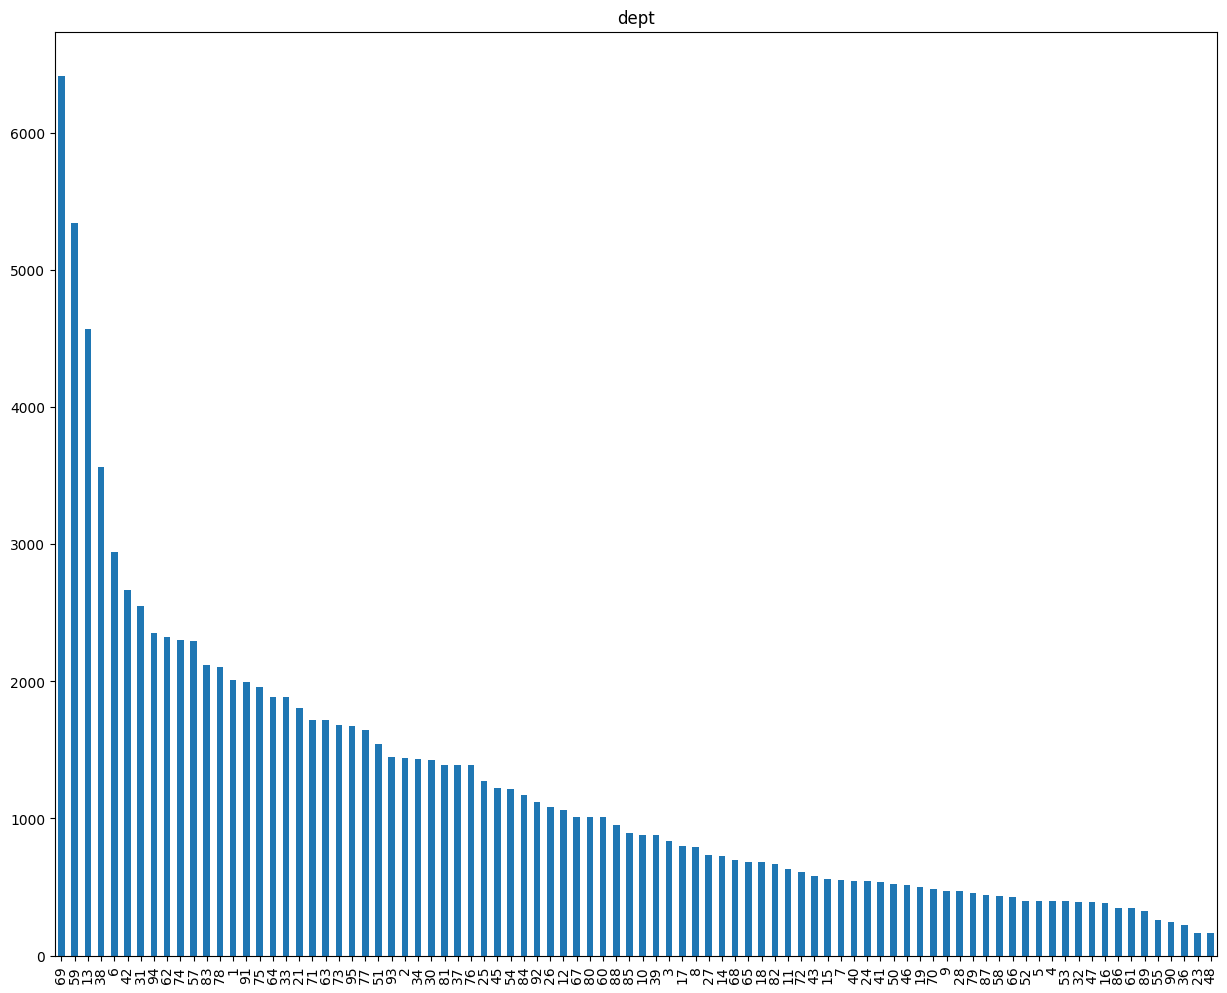

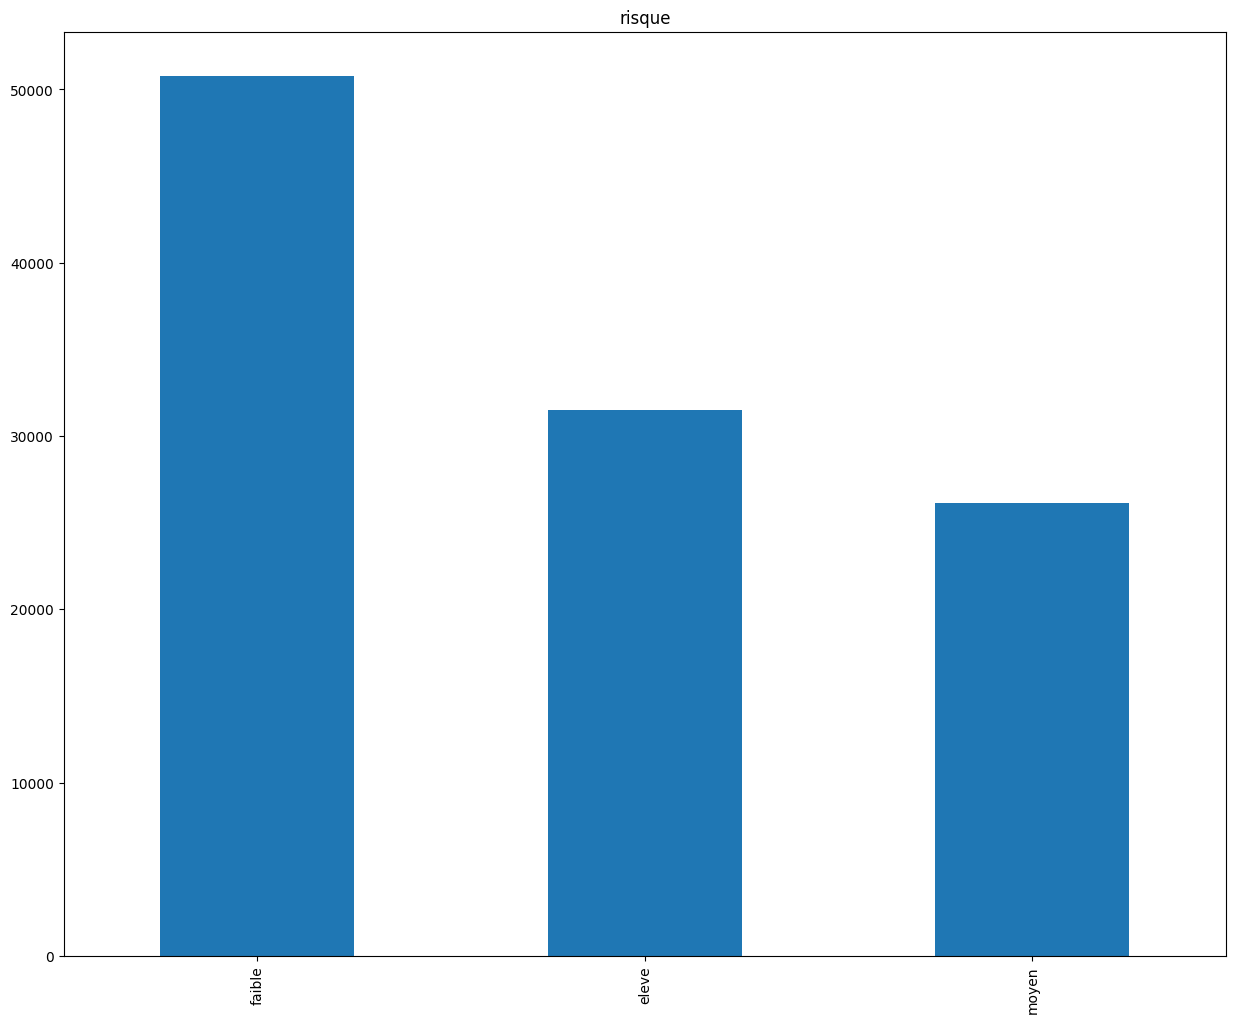

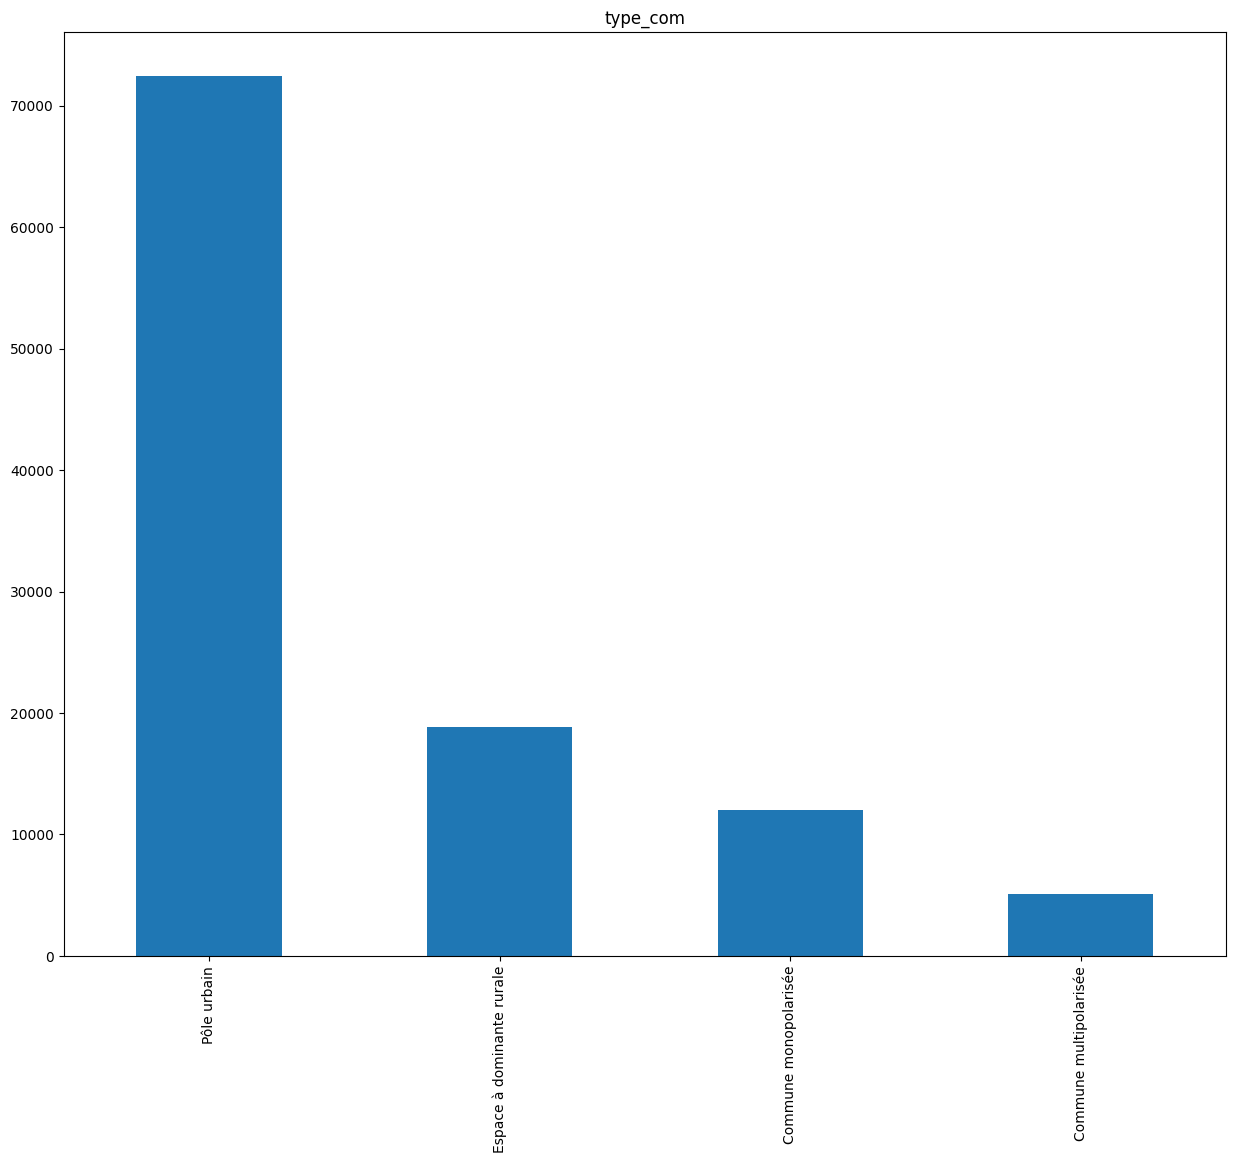

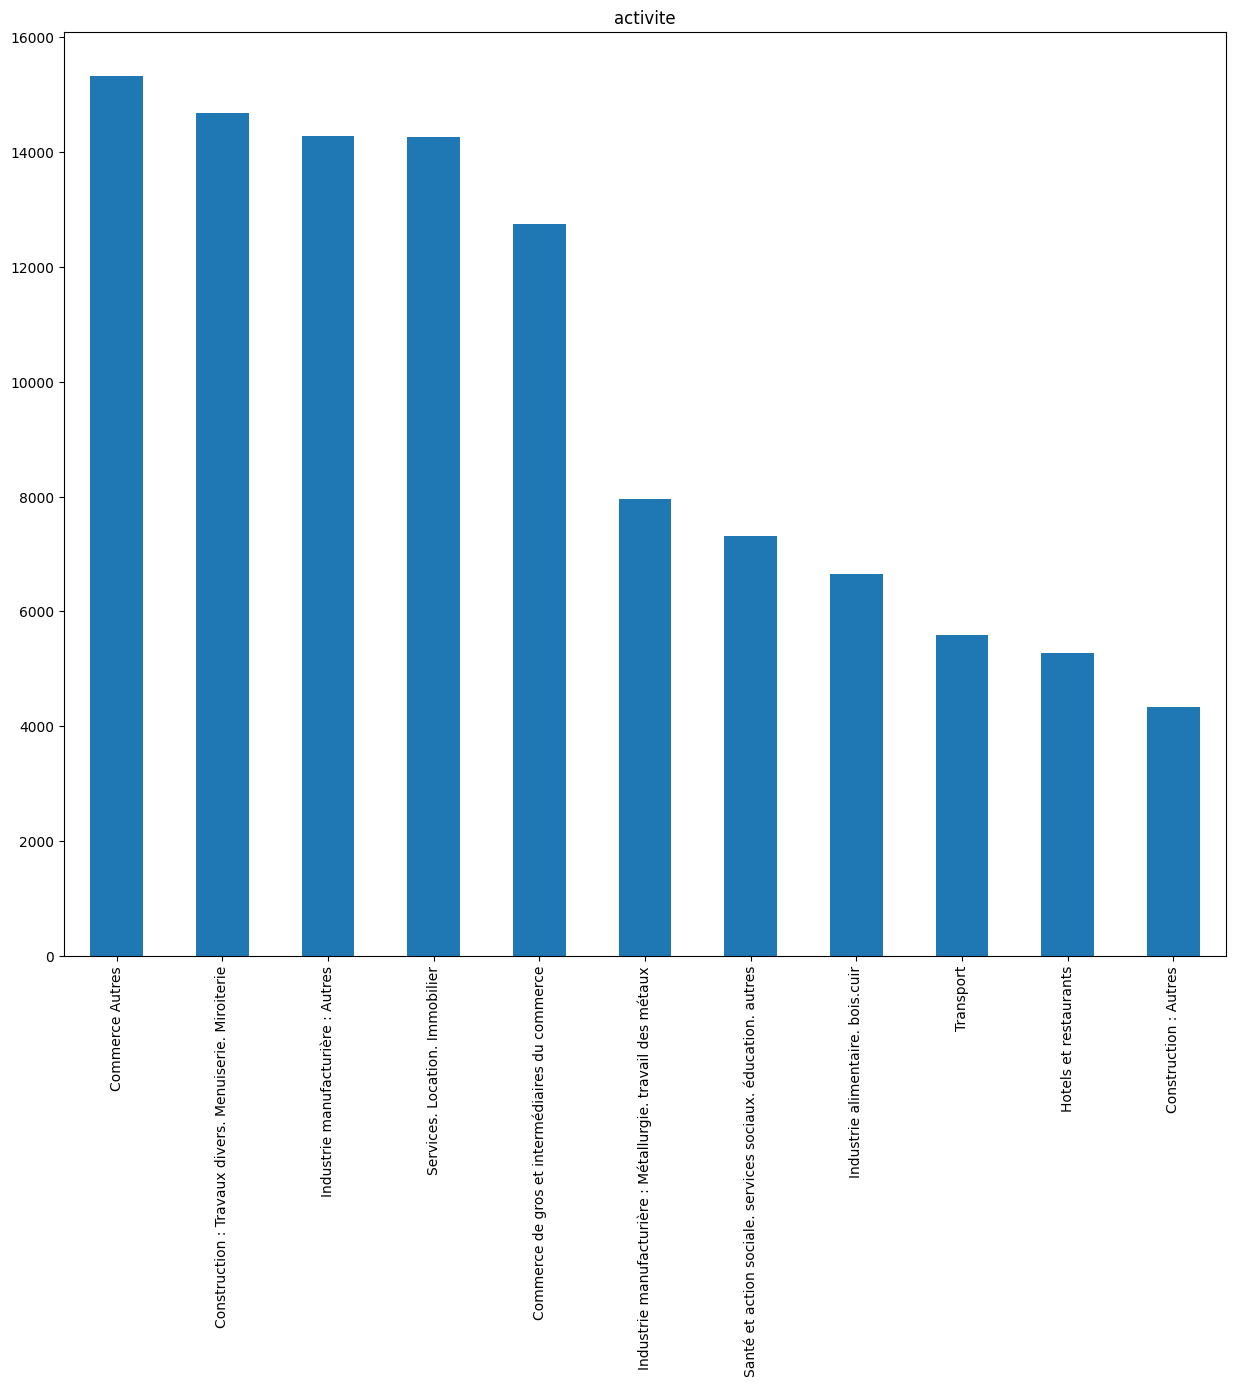

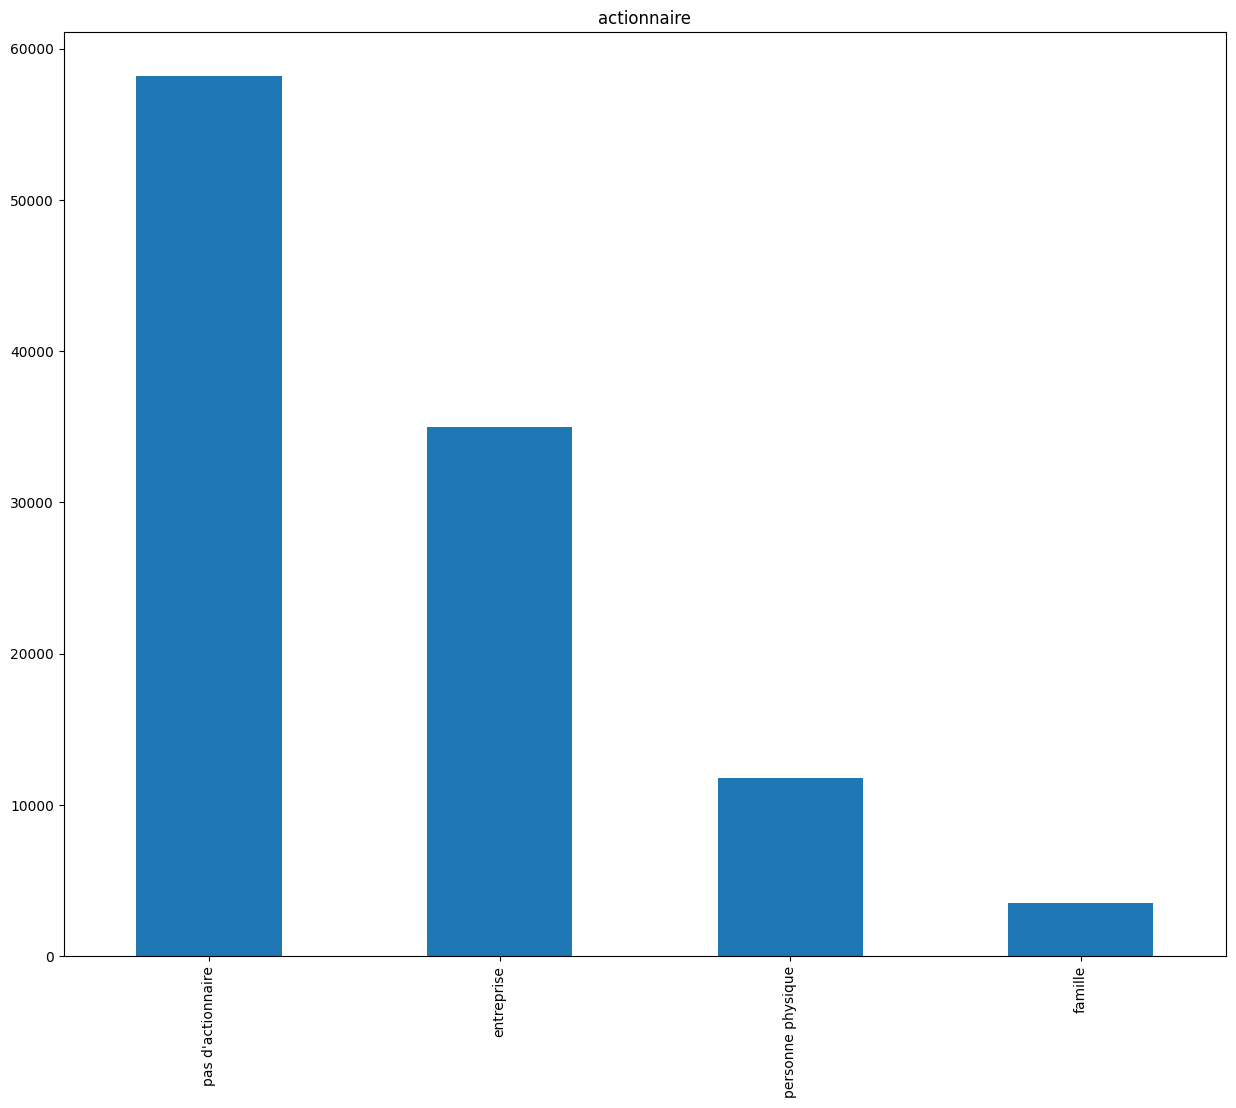

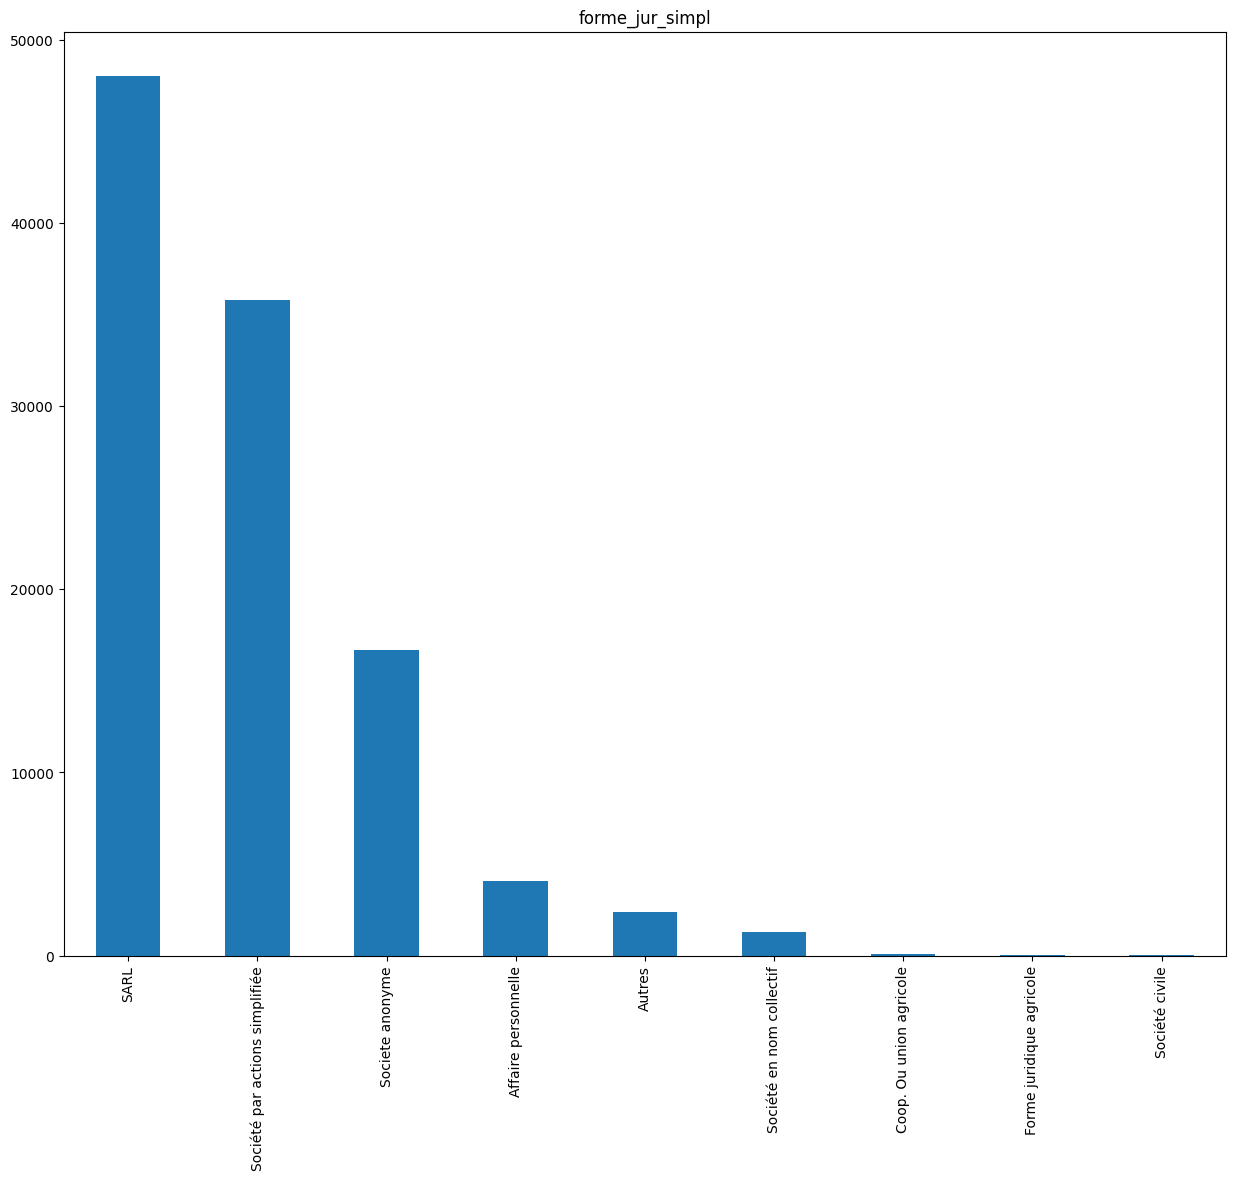

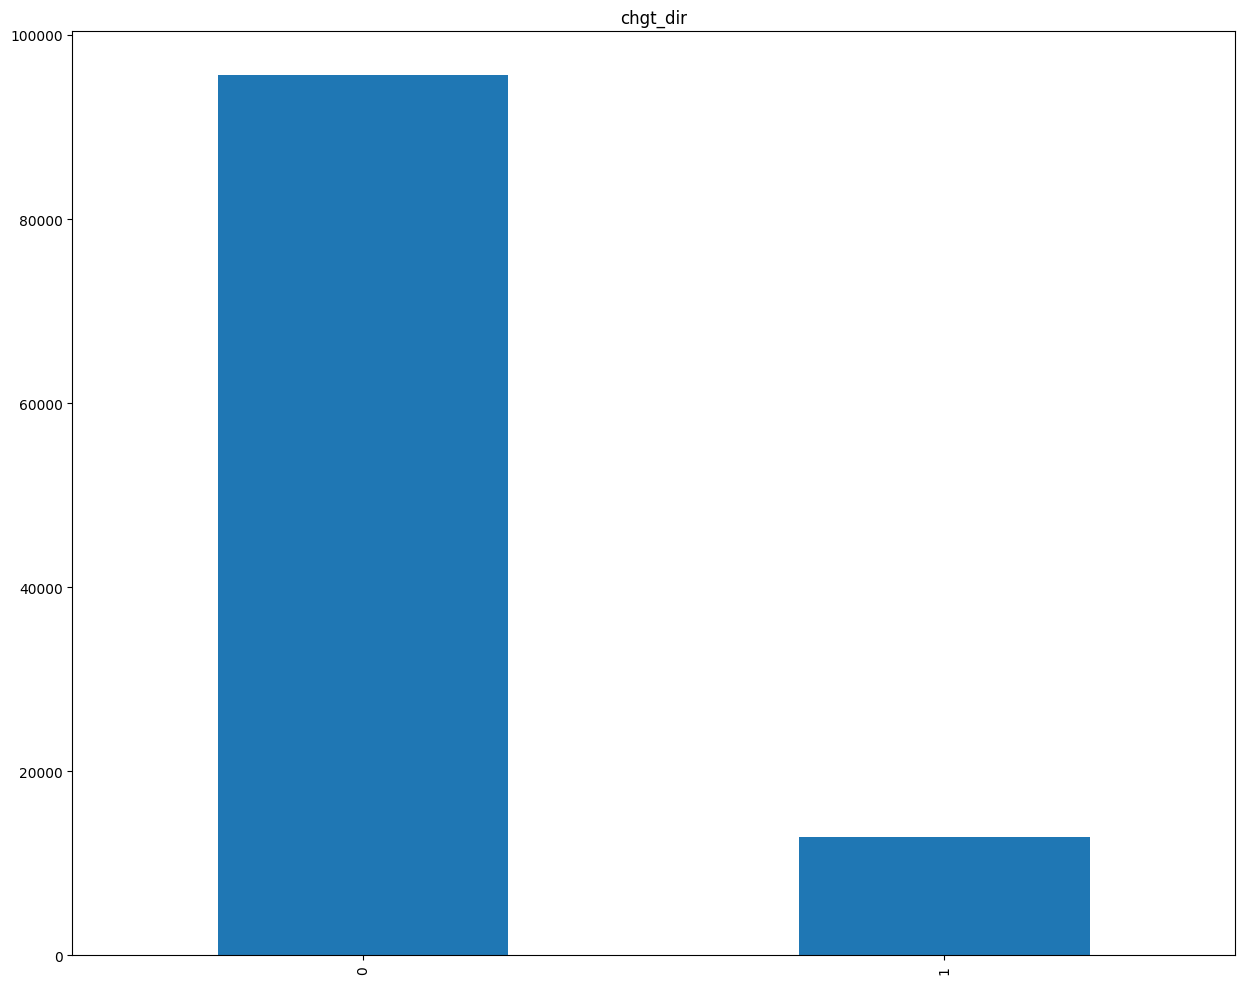

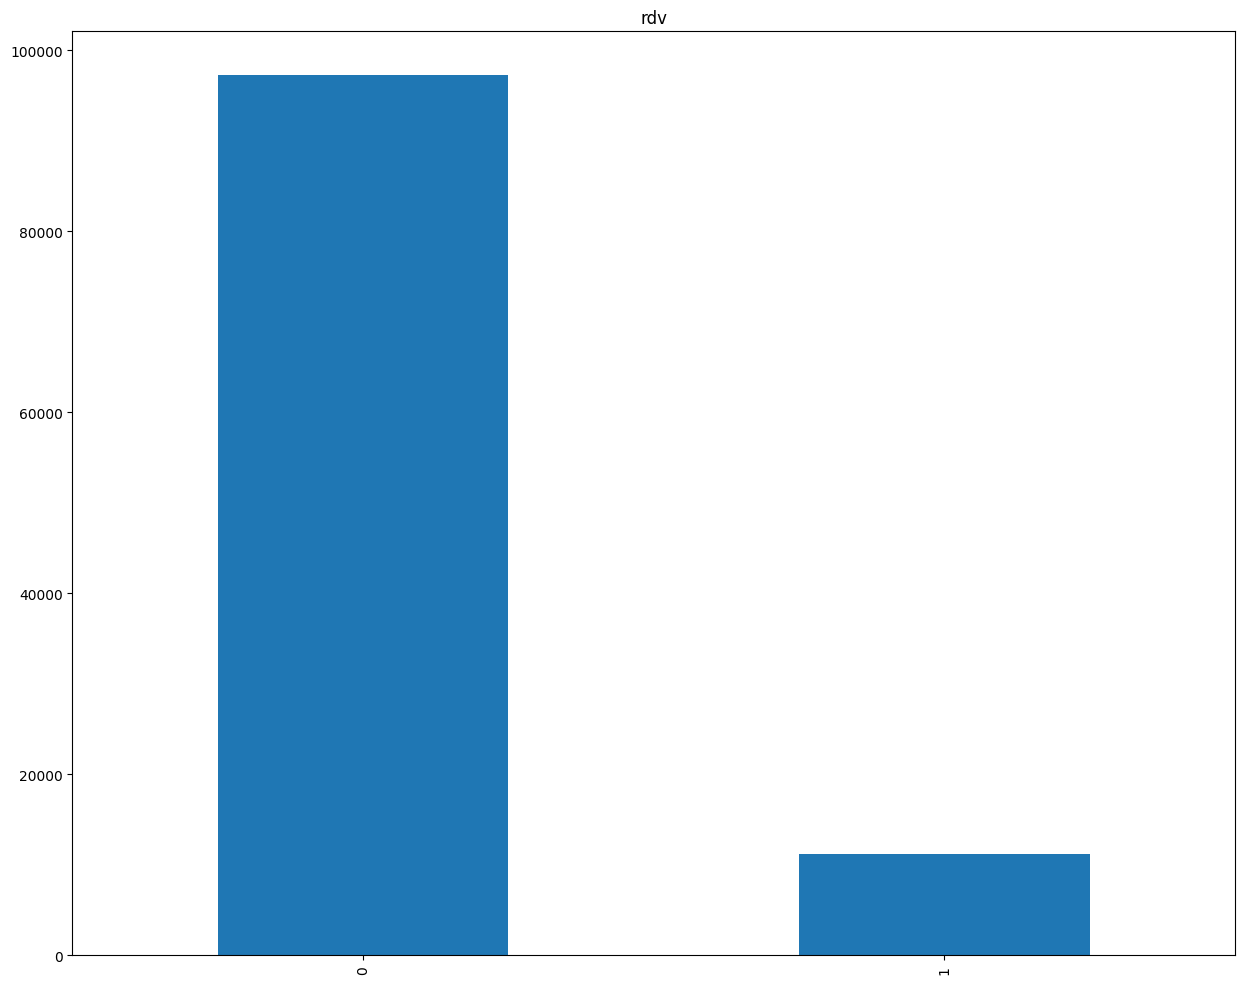

In [15]:
for col in df.columns:
    if col in col_to_omit:
        plt.figure(figsize=(15,12))
        df[col].value_counts().plot.bar(title=col)# plot(kind='hist', logx=False, logy=True, title=col)
        plt.savefig("../fig/analyse_descriptive/"+col+".png")